<a href="https://colab.research.google.com/github/gcv-silva/Banner-do-LinkedIn/blob/main/banner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Instalando as dependências
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython==8.21.0

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 1s (220 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
36 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as reposito

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

from manim import *

Manim Community v0.19.0

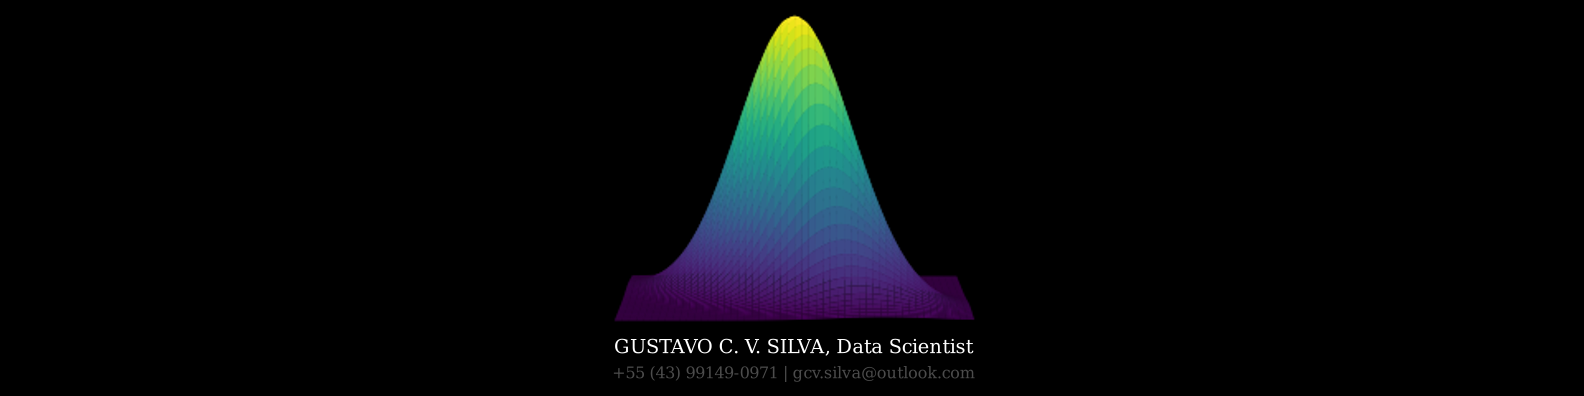

In [46]:
%%manim -r 1584,396 -qk -v WARNING --format png Banner

class Banner(Scene):
    def construct(self):
        # Criando o título e as informações de contato
        titulo = Text("GUSTAVO C. V. SILVA, Data Scientist")
        contato = Text("+55 (43) 99149-0971 | gcv.silva@outlook.com", fill_opacity=0.3)

        # Cria o gráfico 3D da distribuição normal
        x, y = np.mgrid[-3:3:.01, -3:3:.01]
        pos = np.dstack((x, y))
        rv = multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]])
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(x, y, rv.pdf(pos), cmap='viridis')
        ax.set_axis_off()
        ax.view_init(elev=5, azim=0)
        fig.savefig("grafico3d.png", transparent=True)
        plt.close(fig)

        # Tratamento da imagem
        img = Image.open("grafico3d.png")
        img = img.convert("RGBA")
        datas = img.getdata()

        newData = []
        for item in datas:
            if item[0] == 255 and item[1] == 255 and item[2] == 255:
                newData.append((255, 255, 255, 0))
            else:
                newData.append(item)

        img.putdata(newData)
        img.save("grafico3d_transparente.png")

        # Importando o gráfico
        grafico_manim = ImageMobject("grafico3d_transparente.png")
        grafico_manim.scale(2)

        # Configurações finais
        titulo.move_to(ORIGIN + [0.02, -1.34, 0])
        contato.move_to(ORIGIN + [0.02, -1.58, 0])
        grafico_manim.move_to(ORIGIN + [-0.162, 0.33, 0])

        titulo.scale(0.261)
        contato.scale(0.216)

        self.add(titulo, contato, grafico_manim)